# Python-iterating-through-folders-in-directory for mitochondria image

Load the image and convert into brightfield_array

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tifffile
from tifffile import imread
from matplotlib.backends.backend_pdf import PdfPages
import glob, os, re

from aicsimageio import AICSImage, imread, writers
from skimage import color, io

In [3]:
def Get_ome_tif_file(files = glob.glob('Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X10/*.tif') , SaveIMG = "tr_1/One-Ome_tif/210909_6hr_1e5_100nm_630X10.ome.tif"):
    
    files.sort()
    
    Fluro_images = []
    Grayscale_Fluro_images = []
    Brightfield_images = []

    Fluro_images =files[0::2]
    #print(Fluro_images) 

    Brightfield_images =files[1::2]
    print(Brightfield_images) 
    
    files = Brightfield_images
    z_indicator = '_z(\d\d)'
    regex_z = re.compile(z_indicator)

    def sort_key(file):
        return regex_z.search(file).group(1)

    files.sort(key=sort_key)
    brightfld_array = np.expand_dims(np.stack([color.rgb2gray(tifffile.imread(file)) for file in files]), axis=0) # stack all the sorted tiffiles and expand dim to create a "channel dim"
    # z-score normalize array.
    brightfld_array.shape
    
    files = Fluro_images
    z_indicator = '_z(\d\d)'
    regex_z = re.compile(z_indicator)

    def sort_key(file):
        return regex_z.search(file).group(1)

    files.sort(key=sort_key)
    fluroscense_array = np.expand_dims(np.stack([color.rgb2gray(tifffile.imread(file)) for file in files]), axis=0) # stack all the sorted tiffiles and expand dim to create a "channel dim"
    # z-score normalize array.
    fluroscense_array.shape #print(X3.shape)
    
    Mix_ch630X9_6hr_X3= np.concatenate((brightfld_array, fluroscense_array ), axis=0)
    print(Mix_ch630X9_6hr_X3.shape)
    
    with writers.ome_tiff_writer.OmeTiffWriter("tr_1/One-Ome_tif/210909_6hr_1e5_100nm_630X10.ome.tif", overwrite_file=True) as writer:
        writer.save(Mix_ch630X9_6hr_X3, dimension_order="CZYX", channel_names=['brightfield','fluroscense']) 
  

In [4]:
import os
# place the desired path location in the diectory 
directory = "Moffitt_Dataset/Mito_IMG"

for filename in os.listdir(directory):
    #print(os.path.join(directory, filename)) 
    # select disired subfolder from the entire lists of folders
    if filename.endswith("630X1") or filename.endswith("630X2")or filename.endswith("630X3")or filename.endswith("630X4") or filename.endswith("630X5") or filename.endswith("630X6") or filename.endswith("630X7") or filename.endswith("630X8") or filename.endswith("630X9") or filename.endswith("630X10"): 
        
        desiredfile = os.path.join(directory, filename)
        Savefile = filename
        #print(desiredfile)
        #print(Savefile)
        #only select .tif files
        SubDir = desiredfile+ "/*.tif"
        # input desired directory to store the saved .ome files 
        SaveDir = "tr_1/One-Ome_tif/" + Savefile + ".ome.tif"
        # call the function : which convert the numpy array to .ome file 
        Get_ome_tif_file(files = glob.glob(SubDir) , SaveIMG = SaveDir)

['Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z00_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z01_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z02_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z03_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z04_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z05_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z06_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z07_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z08_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_630X8/210909_6hr_1e5_100nm_630X8_z09_ch01.tif', 'Moffitt_Dataset/Mito_IMG/210909_6hr_1e5_100nm_63

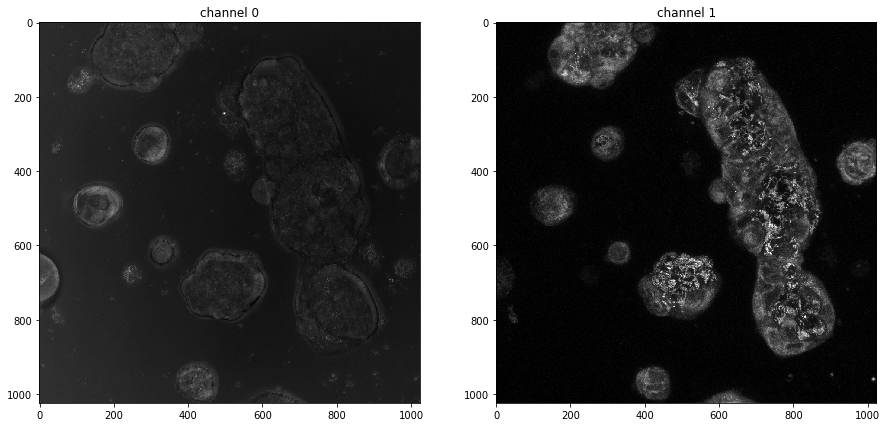

In [5]:
brightfield_1 = AICSImage('tr_1/One-Ome_tif/210909_6hr_1e5_100nm_630X10.ome.tif')
#brightfield_1 = AICSImage('tr_1/One-Ome_tif/630x9_6hr_Ome.ome.tif')
BF_1 = brightfield_1.get_image_data()
imbf_image = np.squeeze(np.squeeze(BF_1, axis=0),axis=0)
#  select one of the two sub-arrays[2, 70, 1024, 1024)]
New_imgbf = imbf_image[0]
New_imgbf.shape

for i in range(0, 1):
  
  fig, axes = plt.subplots(1, 2)
  fig.set_size_inches(15,8 )
  # Plot sample and reconstruciton
  axes[0].imshow(np.max(imbf_image[0],axis=0), cmap='gray')
  axes[0].set_title('channel 0')
  axes[1].imshow(np.max(imbf_image[1],axis=0), cmap='gray')
  axes[1].set_title('channel 1')
    
  plt.show()